In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.shape

(200, 6)

In [5]:
data.size

1200

In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
data['Age'].value_counts()

47    8
49    7
23    7
28    7
39    6
32    6
50    5
22    5
58    5
37    5
60    5
43    4
42    4
41    4
74    4
51    4
34    4
31    4
26    4
24    4
20    4
36    4
45    4
72    4
56    4
57    4
68    4
67    4
65    4
61    4
64    3
35    3
16    3
18    3
70    3
69    3
53    3
15    3
40    3
38    3
59    3
55    2
48    2
19    2
46    2
73    2
52    2
66    2
29    2
62    2
33    1
25    1
21    1
30    1
54    1
17    1
63    1
Name: Age, dtype: int64

In [10]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [11]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [12]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
data['Na_to_K'].value_counts()

12.006    2
18.295    2
9.945     1
9.475     1
20.013    1
         ..
13.884    1
7.285     1
22.905    1
7.340     1
8.750     1
Name: Na_to_K, Length: 198, dtype: int64

In [14]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

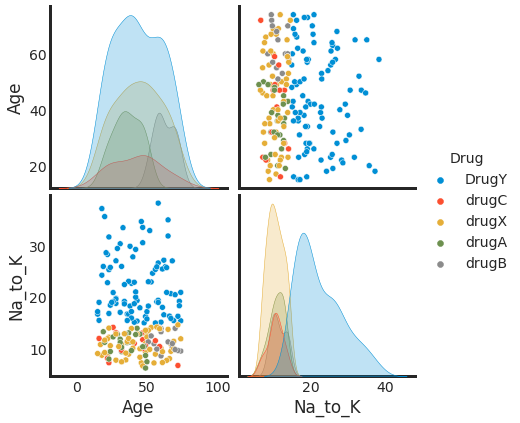

In [15]:
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data,hue='Drug',size= 3)

<AxesSubplot:xlabel='Age', ylabel='count'>

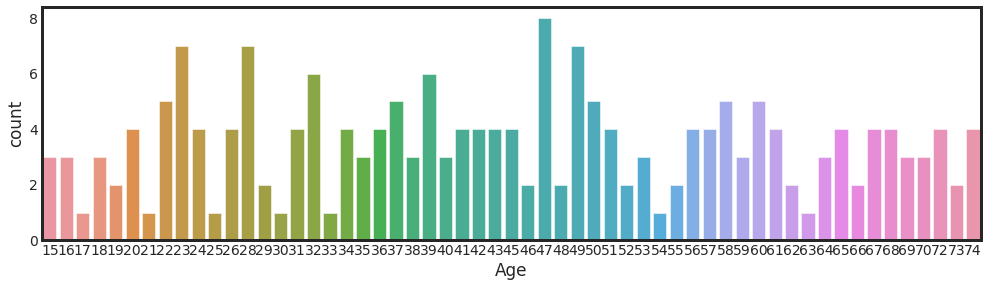

In [16]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data['Age'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

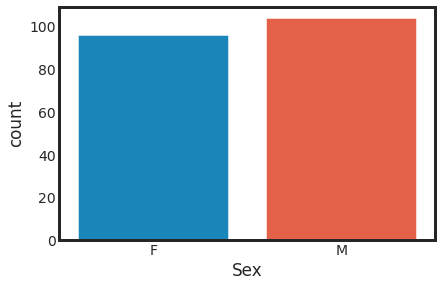

In [17]:
sns.countplot(data['Sex'])

<AxesSubplot:xlabel='BP', ylabel='count'>

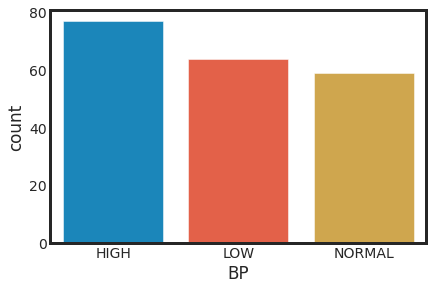

In [18]:
sns.countplot(data['BP'])

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

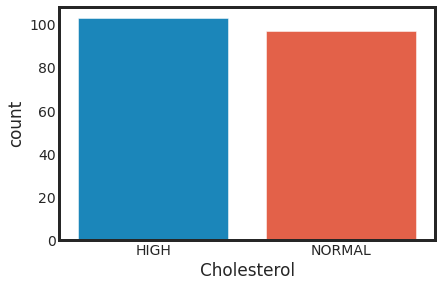

In [19]:
sns.countplot(data['Cholesterol'])

<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

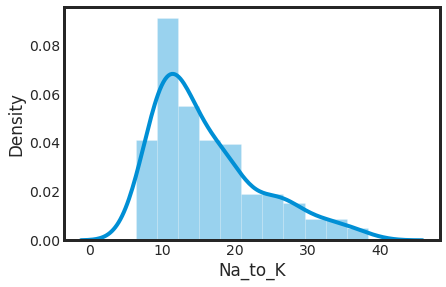

In [20]:
sns.distplot(data['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='count'>

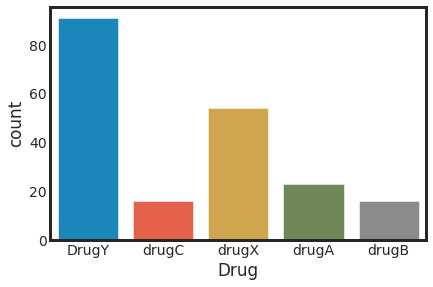

In [21]:
sns.countplot(data['Drug'])

<AxesSubplot:xlabel='Age', ylabel='Drug'>

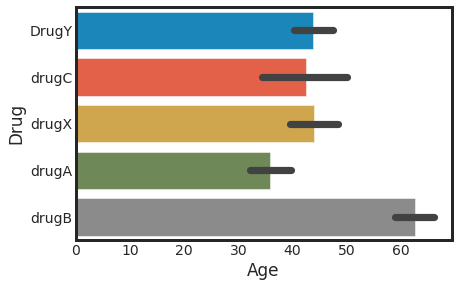

In [22]:
sns.barplot(data['Age'],data['Drug'])

In [23]:
pd.crosstab(data['Age'],data['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Age,,,,,
15,2,0,0,0,1
16,2,0,0,1,0
17,0,0,0,0,1
18,2,0,0,0,1
19,1,1,0,0,0
20,1,1,0,0,2
21,1,0,0,0,0
22,2,0,0,1,2
23,3,1,0,1,2


<AxesSubplot:xlabel='Sex', ylabel='Age'>

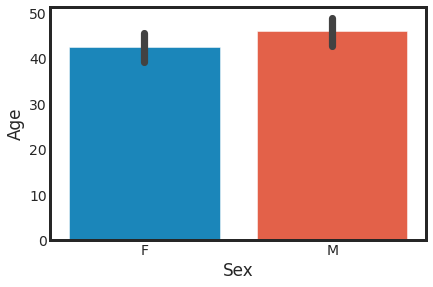

In [24]:
sns.barplot(data['Sex'],data['Age'])

In [25]:
pd.crosstab(data['Sex'],data['Age'])

Age,15,16,17,18,19,20,21,22,23,24,...,64,65,66,67,68,69,70,72,73,74
Sex,,,,,,,,,,,,,,,,,,,,,
F,1,1,0,3,2,3,1,2,1,2,...,1,2,1,1,2,1,1,1,2,1
M,2,2,1,0,0,1,0,3,6,2,...,2,2,1,3,2,2,2,3,0,3


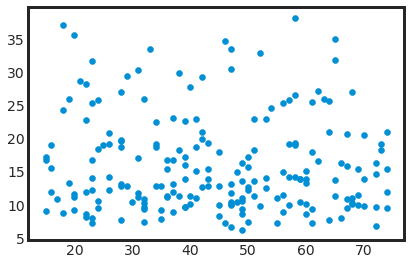

In [26]:
plt.scatter(data['Age'],data['Na_to_K'])

In [27]:
pd.crosstab(data['Age'],data['Na_to_K'])

Na_to_K,6.269,6.683,6.769,7.261,7.285,7.298,7.340,7.477,7.490,7.761,...,31.686,31.876,32.922,33.486,33.542,34.686,34.997,35.639,37.188,38.247
Age,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Age', ylabel='BP'>

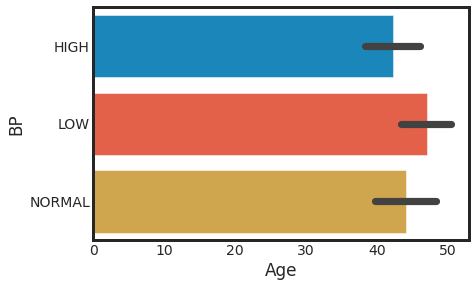

In [28]:
sns.barplot(data['Age'],data['BP'])

In [29]:
pd.crosstab(data['Age'],data['BP'])

BP,HIGH,LOW,NORMAL
Age,,,
15,2,0,1
16,2,1,0
17,0,0,1
18,2,0,1
19,2,0,0
20,2,1,1
21,1,0,0
22,2,1,2
23,2,1,4


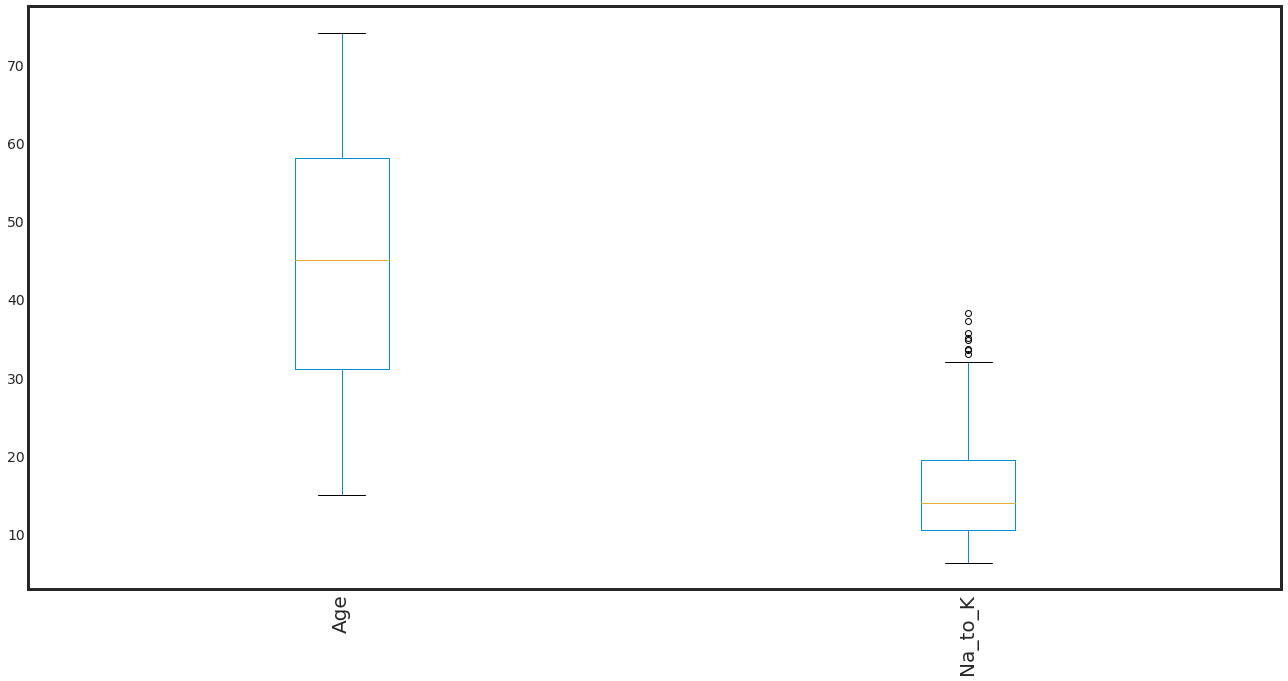

In [30]:
data.plot(kind='box',figsize=(20,10))
plt.xticks(rotation =90,fontsize =20)
plt.show()

<AxesSubplot:>

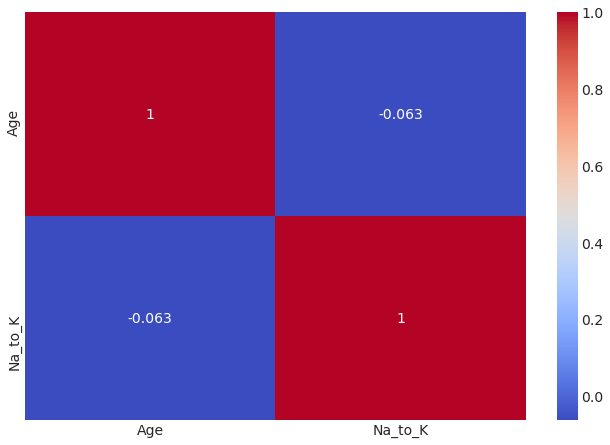

In [31]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [32]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for x in data:
    if data[x].dtypes =='object':
        data[x] = le.fit_transform(data[x])

In [33]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [34]:
x = data.drop(columns = ['Drug'],axis =1)
y = data['Drug']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 13)

In [36]:
x_train.shape

(140, 5)

In [37]:
x_test.shape

(60, 5)

In [38]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7833333333333333

In [39]:
y_test

179    0
155    3
23     0
159    4
96     0
198    4
42     0
110    1
128    0
97     0
95     4
106    4
65     0
33     0
102    3
89     0
132    4
79     4
104    0
70     2
173    0
129    4
30     4
7      3
168    0
124    2
157    0
165    0
101    1
78     1
87     0
141    0
105    4
10     3
64     2
13     0
90     0
15     0
195    3
94     0
125    0
68     0
69     0
108    2
131    0
111    4
92     0
144    1
12     0
93     0
137    1
51     4
18     3
100    1
32     4
19     0
17     1
172    0
192    0
191    1
Name: Drug, dtype: int64

In [40]:
y_predict

array([4, 3, 0, 4, 0, 4, 4, 2, 0, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 2, 0, 4,
       4, 3, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 4, 0, 1, 0, 0, 0, 4, 4, 1, 4, 0, 0, 4, 0, 1])

In [41]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Drug,,,,,
0,26,0,0,0,4
1,4,3,1,0,0
2,0,1,3,0,0
3,2,0,0,3,1
4,0,0,0,0,12


In [42]:
confusion_matrix(y_test,y_predict)

array([[26,  0,  0,  0,  4],
       [ 4,  3,  1,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 2,  0,  0,  3,  1],
       [ 0,  0,  0,  0, 12]])

In [43]:
precision_score(y_test,y_predict,average='macro')

0.8036764705882353

In [44]:
recall_score(y_test,y_predict,average='macro')

0.6983333333333334

In [45]:
f1_score(y_test,y_predict,average='macro')

0.7165925101965146

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.75      0.38      0.50         8
           2       0.75      0.75      0.75         4
           3       1.00      0.50      0.67         6
           4       0.71      1.00      0.83        12

    accuracy                           0.78        60
   macro avg       0.80      0.70      0.72        60
weighted avg       0.80      0.78      0.77        60



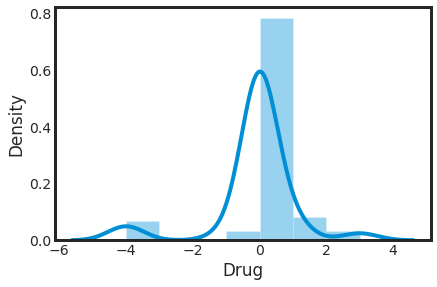

In [47]:
sns.distplot(y_test-y_predict)
plt.show()

In [48]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [49]:
y_predict

array([0, 3, 0, 4, 0, 4, 0, 1, 0, 0, 4, 4, 0, 0, 3, 0, 4, 4, 0, 2, 0, 4,
       4, 3, 0, 2, 0, 0, 1, 1, 0, 0, 4, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 4, 0, 1, 0, 0, 1, 4, 3, 1, 4, 0, 1, 0, 0, 1])

In [50]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Drug,,,,,
0,30,0,0,0,0
1,0,8,0,0,0
2,0,0,4,0,0
3,0,0,0,6,0
4,0,0,0,0,12


In [51]:
confusion_matrix(y_test,y_predict)

array([[30,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 12]])

In [52]:
precision_score(y_test,y_predict,average='macro')

1.0

In [53]:
recall_score(y_test,y_predict,average='macro')

1.0

In [54]:
f1_score(y_test,y_predict,average='macro')

1.0

In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



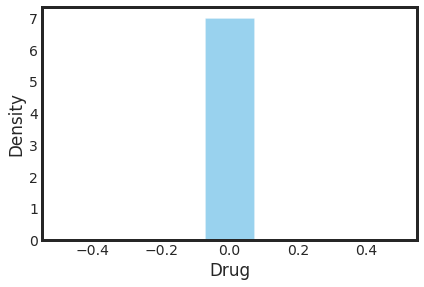

In [56]:
sns.distplot(y_test-y_predict)
plt.show()

In [57]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [58]:
y_predict

array([0, 3, 0, 4, 0, 4, 0, 1, 0, 0, 4, 4, 0, 0, 3, 0, 4, 4, 0, 2, 0, 4,
       4, 3, 0, 2, 0, 0, 1, 1, 0, 0, 4, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 4, 0, 1, 0, 0, 1, 4, 3, 1, 4, 0, 1, 0, 0, 1])

In [59]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Drug,,,,,
0,30,0,0,0,0
1,0,8,0,0,0
2,0,0,4,0,0
3,0,0,0,6,0
4,0,0,0,0,12


In [60]:
confusion_matrix(y_test,y_predict)

array([[30,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 12]])

In [61]:
precision_score(y_test,y_predict,average='macro')

1.0

In [62]:
recall_score(y_test,y_predict,average='macro')

1.0

In [63]:
f1_score(y_test,y_predict,average='macro')

1.0

In [64]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



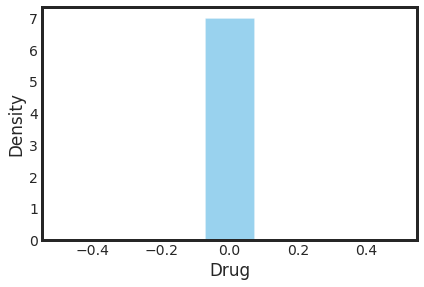

In [65]:
sns.distplot(y_test-y_predict)
plt.show()

In [66]:
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.5

In [67]:
y_predict

array([4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0])

In [68]:
pd.crosstab(y_test,y_predict)

col_0,0,4
Drug,,
0,25,5
1,7,1
2,0,4
3,3,3
4,7,5


In [69]:
confusion_matrix(y_test,y_predict)

array([[25,  0,  0,  0,  5],
       [ 7,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  4],
       [ 3,  0,  0,  0,  3],
       [ 7,  0,  0,  0,  5]])

In [70]:
precision_score(y_test,y_predict,average='macro')

0.1746031746031746

In [71]:
recall_score(y_test,y_predict,average='macro')

0.25

In [72]:
f1_score(y_test,y_predict,average='macro')

0.20555555555555555

In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.83      0.69        30
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.28      0.42      0.33        12

    accuracy                           0.50        60
   macro avg       0.17      0.25      0.21        60
weighted avg       0.35      0.50      0.41        60



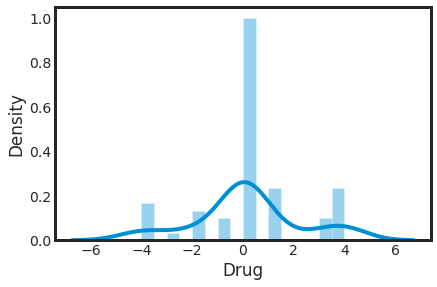

In [74]:
sns.distplot(y_test-y_predict)
plt.show()

In [75]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([4, 1, 4, 1, 0, 4, 4, 1, 0, 0, 1, 4, 0, 0, 1, 4, 4, 1, 0, 2, 0, 1,
       4, 4, 0, 4, 0, 0, 1, 4, 4, 0, 4, 3, 2, 0, 0, 0, 2, 4, 0, 0, 0, 2,
       0, 4, 0, 4, 0, 0, 1, 2, 4, 1, 4, 0, 4, 0, 0, 4])

In [76]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Drug,,,,,
0,24,0,0,0,6
1,0,4,0,0,4
2,0,0,3,0,1
3,0,2,1,1,2
4,0,4,1,0,7


In [77]:
confusion_matrix(y_test,y_predict)

array([[24,  0,  0,  0,  6],
       [ 0,  4,  0,  0,  4],
       [ 0,  0,  3,  0,  1],
       [ 0,  2,  1,  1,  2],
       [ 0,  4,  1,  0,  7]])

In [78]:
precision_score(y_test,y_predict,average='macro')

0.67

In [79]:
recall_score(y_test,y_predict,average='macro')

0.5599999999999999

In [80]:
f1_score(y_test,y_predict,average='macro')

0.5446428571428571

In [81]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        30
           1       0.40      0.50      0.44         8
           2       0.60      0.75      0.67         4
           3       1.00      0.17      0.29         6
           4       0.35      0.58      0.44        12

    accuracy                           0.65        60
   macro avg       0.67      0.56      0.54        60
weighted avg       0.76      0.65      0.66        60



In [82]:
y_predict = model.predict(x_test)

In [83]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[24  0  0  0  6]
 [ 0  4  0  0  4]
 [ 0  0  3  0  1]
 [ 0  2  1  1  2]
 [ 0  4  1  0  7]]


<AxesSubplot:>

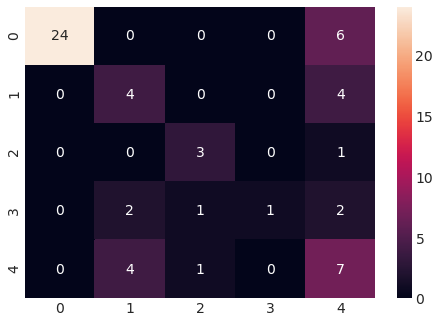

In [84]:
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [85]:

model = BernoulliNB()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.45

In [86]:
y_predict

array([4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0])

In [87]:
pd.crosstab(y_test,y_predict)

col_0,0,4
Drug,,
0,16,14
1,8,0
2,4,0
3,3,3
4,1,11


In [88]:
confusion_matrix(y_test,y_predict)

array([[16,  0,  0,  0, 14],
       [ 8,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  3],
       [ 1,  0,  0,  0, 11]])

In [89]:
precision_score(y_test,y_predict,average='macro')

0.17857142857142855

In [90]:
recall_score(y_test,y_predict,average='macro')

0.29

In [91]:
f1_score(y_test,y_predict,average='macro')

0.21322580645161296

In [92]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52        30
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.39      0.92      0.55        12

    accuracy                           0.45        60
   macro avg       0.18      0.29      0.21        60
weighted avg       0.33      0.45      0.37        60



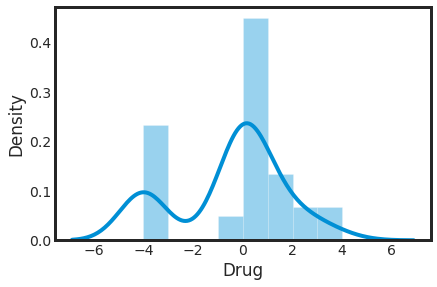

In [93]:
sns.distplot(y_test-y_predict)
plt.show()

In [94]:
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9666666666666667

In [95]:
y_predict

array([0, 3, 0, 4, 0, 4, 0, 3, 0, 0, 4, 4, 0, 0, 3, 0, 4, 4, 0, 2, 0, 4,
       4, 3, 0, 2, 0, 0, 1, 1, 0, 0, 4, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 4, 0, 1, 0, 0, 1, 4, 3, 1, 4, 0, 3, 0, 0, 1])

In [96]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Drug,,,,,
0,30,0,0,0,0
1,0,6,0,2,0
2,0,0,4,0,0
3,0,0,0,6,0
4,0,0,0,0,12


In [97]:
confusion_matrix(y_test,y_predict)

array([[30,  0,  0,  0,  0],
       [ 0,  6,  0,  2,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 12]])

In [98]:
precision_score(y_test,y_predict,average='macro')

0.95

In [99]:
recall_score(y_test,y_predict,average='macro')

0.95

In [100]:
f1_score(y_test,y_predict,average='macro')

0.9428571428571428

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         4
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00        12

    accuracy                           0.97        60
   macro avg       0.95      0.95      0.94        60
weighted avg       0.97      0.97      0.97        60



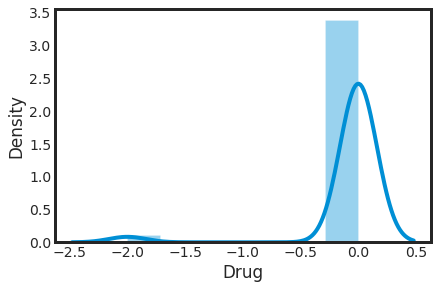

In [102]:
sns.distplot(y_test-y_predict)
plt.show()

In [103]:
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.6666666666666666

In [104]:
y_predict

array([0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 4,
       4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 4,
       0, 4, 0, 4, 0, 0, 4, 4, 4, 1, 4, 0, 4, 0, 0, 4])

In [105]:
pd.crosstab(y_test,y_predict)

col_0,0,1,4
Drug,,,
0,27,0,3
1,0,1,7
2,0,0,4
3,0,0,6
4,0,0,12


In [106]:
confusion_matrix(y_test,y_predict)

array([[27,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  7],
       [ 0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  0, 12]])

In [107]:
precision_score(y_test,y_predict,average='macro')

0.475

In [108]:
recall_score(y_test,y_predict,average='macro')

0.40499999999999997

In [109]:
f1_score(y_test,y_predict,average='macro')

0.3430090377458798

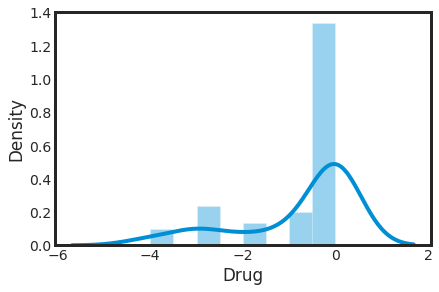

In [110]:
sns.distplot(y_test-y_predict)
plt.show()

In [111]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 30, 4: 12, 1: 8, 3: 6, 2: 4})


col_0,0,1,4
Drug,,,
0,27,0,3
1,0,1,7
2,0,0,4
3,0,0,6
4,0,0,12


In [112]:
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [113]:
x.head()

,0,1,2,3,4
0,-21.620914,8.556488,-0.618728,-0.006797,0.738319
1,2.787925,-2.903331,0.082171,-0.634392,0.144476
2,2.889243,-5.880080,0.032939,-0.615478,0.163320
3,-16.021124,-8.850426,1.060914,0.216043,0.600103
4,16.608175,2.528216,0.160286,0.216472,0.665454


In [114]:
pca.explained_variance_ratio_

array([8.37652699e-01, 1.58821492e-01, 2.03699655e-03, 7.50867528e-04,
       7.37945622e-04])

In [115]:
pca.explained_variance_ratio_

array([8.37652699e-01, 1.58821492e-01, 2.03699655e-03, 7.50867528e-04,
       7.37945622e-04])

<AxesSubplot:>

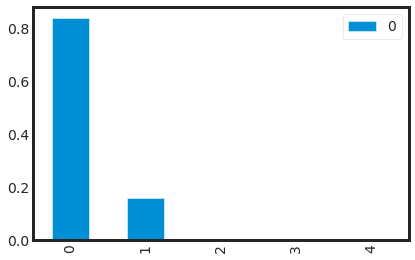

In [116]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [117]:
pca.explained_variance_ratio_[0:-1].sum()

0.9992620543778892

In [118]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3
0,-21.620914,8.556488,-0.618728,-0.006797
1,2.787925,-2.903331,0.082171,-0.634392
2,2.889243,-5.880080,0.032939,-0.615478
3,-16.021124,-8.850426,1.060914,0.216043
4,16.608175,2.528216,0.160286,0.216472


In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.7833333333333333
MSE: 2.216666666666667
RMSE: 1.4888474289418197


In [120]:
1.4888474289418197/(max(y)-min(y))

0.3722118572354549

In [121]:
metrics.accuracy_score(y_test, y_predict)

0.6666666666666666

In [122]:
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "BNB" : BernoulliNB(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
    
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [123]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7833333333333333,
 'Random Forest': 1.0,
 'DecisionTree': 1.0,
 'KNN': 0.65,
 'MPL': 0.6166666666666667,
 'BNB': 0.45,
 'XGB': 0.9666666666666667,
 'SVM': 0.65}

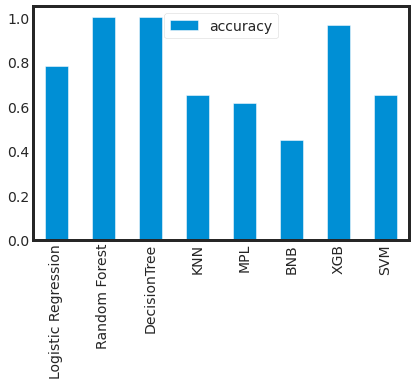

In [124]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();